1) Delivery_time -> Predict delivery time using sorting time                                                                    
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using Python.

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Import data set

In [2]:
import pandas as pd
delivery_time=pd.read_csv("C:\\Users\\jhishna2022\\Downloads\\delivery_time.csv")
delivery_time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA

## Rename the column

In [3]:

delivery_time=delivery_time.rename({'Delivery Time': 'DeliveryTime','Sorting Time':'SortingTime'},axis=1)

## Checking for not null count and data types

In [4]:
delivery_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


## Data Visualisation  ----> to visualize the correlation between the variables

<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

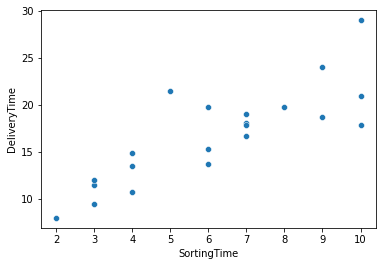

In [5]:
import seaborn as sns
sns.scatterplot(x='SortingTime',y='DeliveryTime',data=delivery_time)

## Correlation

In [6]:
delivery_time.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


So, Delivery Time and Sorting Time are positively correlated

## Data visualizations -----> to check normality of the variables

<AxesSubplot:xlabel='SortingTime', ylabel='Density'>

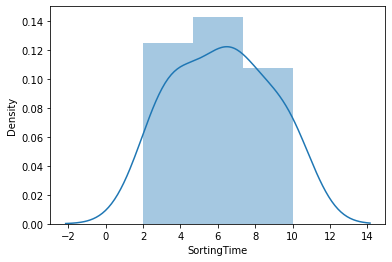

In [7]:
import seaborn as sns
sns.distplot(delivery_time['SortingTime'])

<AxesSubplot:xlabel='DeliveryTime', ylabel='Density'>

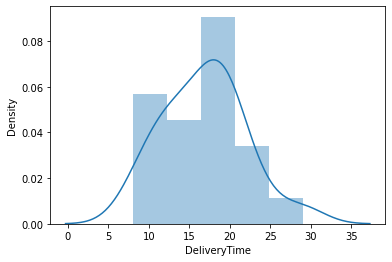

In [8]:
sns.distplot(delivery_time['DeliveryTime'])

In [ ]:
!pip install statsmodels

In [9]:
import statsmodels.formula.api as smf

## Model Building

In [10]:
#OLS(Ordinary Least Squares)
#I will build OLS model to predict Delivery Time
model=smf.ols("DeliveryTime~SortingTime",data=delivery_time).fit()

<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

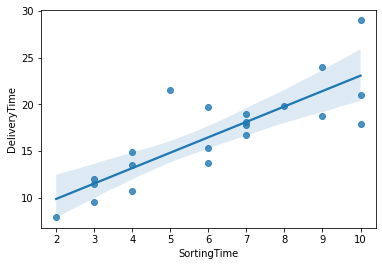

In [11]:
sns.regplot(x='SortingTime',y='DeliveryTime',data=delivery_time)

In [12]:
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [13]:
model.pvalues

Intercept      0.001147
SortingTime    0.000004
dtype: float64

In [14]:
# Fitted values on the regression line/predicted values for the given SortingTime
delivery_time['Predicted']=model.fittedvalues


In [16]:
delivery_time

,DeliveryTime,SortingTime,Predicted
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933
5,15.35,6,16.476853
6,19.00,7,18.125873
7,9.50,3,11.529794
8,17.90,10,23.072933
9,18.75,9,21.423913


In [17]:
model.rsquared

0.6822714748417231

So, we can say 68.22% variation in the dependent variable is explained by the independent variable.

### Prediction for new data point using this least square linear regression model

In [18]:
data=pd.DataFrame([11],columns=['SortingTime'])
model.predict(data)

0    24.721953
dtype: float64

So, for 11unit Sorting Time, the predicted Delivery time is 24.721953

2) Salary_hike -> Build a prediction model for Salary_hike                                                                      
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [19]:
import pandas as pd
from scipy import stats

## Import the data set

In [20]:
salary_hike=pd.read_csv("C:\\Users\\jhishna2022\\Downloads\\Salary_Data.csv")
salary_hike

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA

## To check for non null count and data types

In [21]:
salary_hike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


## Scatterplot to visuailze the correlation between the two variables

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

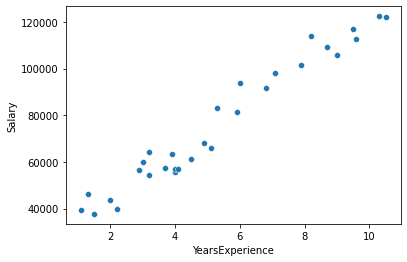

In [22]:
import seaborn as sns
sns.scatterplot(x='YearsExperience',y='Salary',data=salary_hike)

## Correlation

In [23]:
salary_hike.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


So, Salary and Years of experience are strongly correlated. Positive correlation. So, we can use Ordinary least square method to predict salary hike.

## Data Visualisation ---> to check the normality of the variables

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

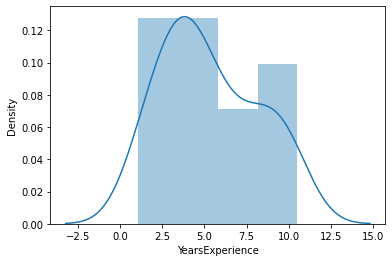

In [24]:
import seaborn as sns
sns.distplot(salary_hike['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

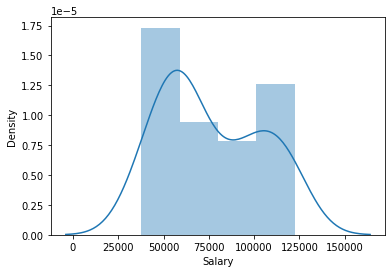

In [25]:
sns.distplot(salary_hike['Salary'])

## Model building

In [26]:
import statsmodels.formula.api as smf
model=smf.ols("Salary~YearsExperience",data=salary_hike).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

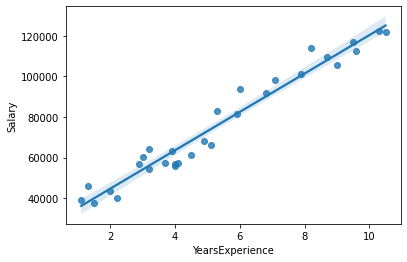

In [27]:
sns.regplot(x='YearsExperience',y='Salary',data=salary_hike)

In [28]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [29]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

pvalue of B1 = 0.00, < 0.05, So, Salary is highly dependent on Years of experience.

In [30]:
# Fitted salary on the regression line/predicted value for all Years of experiec given
salary_hike['Predicted']=model.predict(salary_hike['YearsExperience'])
salary_hike

,YearsExperience,Salary,Predicted
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


In [31]:
model.rsquared

0.9569566641435086

95.7% variation of salary hike is explained by the Years of experience. So, this model is the best model to predict salary hike for any given years of experience

### To predict the Salary  for new data points using this model

In [32]:
# Years of experience is 4.5 years and 6.5 years
data=pd.Series([4.5,6.5])
data

0    4.5
1    6.5
dtype: float64

In [33]:
data1=pd.DataFrame(data,columns=['YearsExperience'])
data1

,YearsExperience
0,4.5
1,6.5


In [34]:
model.predict(data1)

0    68317.030645
1    87216.955288
dtype: float64

So, from the model, we can see a person having 4.5 years of experience should get 68317/- as salary and a person with 6.5 years of experience will get 87217/- as salary.